# 判断英文文稿所属的类别
## 实际问题
已经分好了若干类别的文档，根据其分类情况，构建分类模型，对新的文稿进行分类。
## 问题归类
分类问题：监督学习、分类问题（多分类）
## 数据集说明
给出了若干类型的文档，同时已经对文档做了训练集和测试集的切分。  
使用训练集中的数据学习分类标准，使用测试集中的数据验证返回结果的情况。  
数据集下载：http://qwone.com/~jason/20Newsgroups/

已有有类别的文档若干，训练集、测试集已分离。训练集中需要做训练和验证的区分  
数据集说明：数据集中包含11314个训练数据，7532个测试数据

## 运行环境


Python 3.11.5  

Name: numpy  
Version: 1.24.3  

Name: pandas  
Version: 2.0.3  

Name: matplotlib  
Version: 3.7.2  

Name: scikit-learn  
Version: 1.3.0 

# 0.整体的显示设置

In [15]:
# 优化
# 1.不显示错误警告
import warnings
warnings.filterwarnings('ignore')

# 2.画图过程中的中文显示
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = ['sans-serif']
plt.rcParams['font.sans-serif'] = ['SimHei']

# 1.定义问题
题头已做说明。  

# 2.理解数据

In [1]:
# 导入包
from sklearn.datasets import load_files
from sklearn.feature_extraction.text import CountVectorizer # 用于将文本数据转换为机器学习算法可以处理的数值特征
from sklearn.feature_extraction.text import TfidfVectorizer # 用于将文本数据转换为机器学习算法可以处理的数值特征
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot as plt

# 时间记录
import time

### 导入数据

In [3]:
# 导入数据
time1 = time.time()
categories = ['alt.atheism',
              'rec.sport.hockey',
              'comp.graphics',
              'sci.crypt',
              'comp.os.ms-windows.misc',
              'sci.electronics',
              'comp.sys.ibm.pc.hardware',
              'sci.med',
              'comp.sys.mac.hardware',
              'sci.space',
              'comp.windows.x',
              'soc.religion.christian',
              'misc.forsale',
              'talk.politics.guns',
              'rec.autos' 
              'talk.politics.mideast',
              'rec.motorcycles',
              'talk.politics.misc',
              'rec.sport.baseball',
              'talk.religion.misc']

# 注意读取文件夹文件的方法
# 导入训练数据
# 现在硬盘里根据关键词找一下
# 注意学习一下，路径下的内容在文件夹里面
# load_files加载包含文本或图像数据集的文件夹
train_path = r'E:\Fold1_课程\4_网上素材\bigdata\practise6\all\4_textclassificationmodel\20news-bydate\20news-bydate-train'
dataset_train = load_files(container_path = train_path, categories = categories)

# 导入评估数据
test_path = r'E:\Fold1_课程\4_网上素材\bigdata\practise6\all\4_textclassificationmodel\20news-bydate\20news-bydate-test'
dataset_test = load_files(container_path = test_path, categories = categories)

time2 = time.time()

print("本部分耗时：",time2 - time1)

本部分耗时： 301.4700803756714


# 3.数据准备

In [14]:
time1 = time.time()

# 计算词频
count_vect = CountVectorizer(stop_words='english', decode_error='ignore')
X_train_counts = count_vect.fit_transform(dataset_train.data)

# 查看数据维度
print(X_train_counts.shape)

time2 = time.time()
print("本部分耗时：", time2 - time1)

(10156, 122402)
本部分耗时： 3.6596193313598633


In [5]:
time1 = time.time()

# 计算TF-IDF，构建词向量
tf_transformer = TfidfVectorizer(stop_words='english', decode_error='ignore')
X_train_counts_tf = tf_transformer.fit_transform(dataset_train.data)

time2 = time.time()
print("本部分耗时：", time2 - time1)

本部分耗时： 2.15875244140625


# 4.评估算法

In [6]:
time1 = time.time()

# 查看数据维度
print(X_train_counts_tf.shape)

# 设置评估算法的基准
num_folds = 10
seed = 7
scoring = 'accuracy'


# 3）评估算法
# 生成算法模型
models = {}
models['LR']   = LogisticRegression()
models['SVM']  = SVC()
models['CART'] = DecisionTreeClassifier()
models['MNB']  = MultinomialNB()
models['KNN']  = KNeighborsClassifier()


# 比较算法
results = []
for key in models:
    kfold = KFold(n_splits = num_folds, random_state = seed, shuffle  = True)
    cv_results = cross_val_score(models[key], X_train_counts_tf, dataset_train.target, cv = kfold, scoring = scoring)
    results.append(cv_results)
    print('%s : %f (%f)' % (key, cv_results.mean(), cv_results.std()))
    
time2 = time.time()
print("本部分耗时：", time2 - time1)

(10156, 122402)
LR : 0.904193 (0.008237)
SVM : 0.906065 (0.008374)
CART : 0.659708 (0.016513)
MNB : 0.881349 (0.011071)
KNN : 0.795983 (0.010343)
本部分耗时： 2620.345468044281


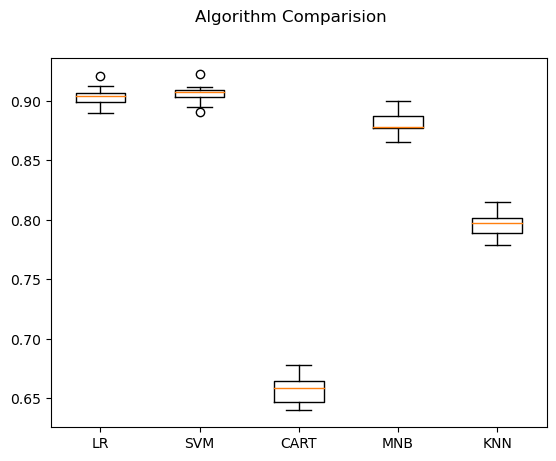

In [8]:
time1 = time.time()

# 箱线图比较算法
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(models.keys())
plt.show()

time2 = time.time()
print("本部分耗时：", time2 - time1)

In [8]:
time1 = time.time()

# 4）算法调参
# 调参LR
param_grid = {}
param_grid['C'] = [0.1, 5, 13, 15]
model = LogisticRegression(max_iter = 1000) # 缺省时max_iter = 100
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=X_train_counts_tf, y=dataset_train.target)
print("LR调参结果：")
print('最优 : %s 使用 %s' % (grid_result.best_score_, grid_result.best_params_))


time2 = time.time()
print("本部分耗时：", time2 - time1)

LR调参结果：
最优 : 0.9240821729180405 使用 {'C': 13}
本部分耗时： 1911.0423846244812


In [9]:
time1 = time.time()

# 调参MNB
param_grid = {}
param_grid['alpha'] = [0.001, 0.01, 0.1, 1.5]
model = MultinomialNB()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=X_train_counts_tf, y=dataset_train.target)
print("MNB调参结果")
print('最优 : %s 使用 %s' % (grid_result.best_score_, grid_result.best_params_))


time2 = time.time()
print("本部分耗时：", time2 - time1)

MNB调参结果
最优 : 0.9153203909856096 使用 {'alpha': 0.01}
本部分耗时： 4.0638580322265625


# 5.优化模型

In [10]:
time1 = time.time()

# 5）集成算法
ensembles = {}
ensembles['RF'] = RandomForestClassifier()
ensembles['AB'] = AdaBoostClassifier()

# 比较集成算法
results = []
for key in ensembles:
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(ensembles[key], X_train_counts_tf, dataset_train.target, cv=kfold, scoring=scoring)
    results.append(cv_results)
    print("集成算法结果：")
    print('%s : %f (%f)' % (key, cv_results.mean(), cv_results.std()))
    
time2 = time.time()
print("本部分耗时：", time2 - time1)

集成算法结果：
RF : 0.857815 (0.009090)
集成算法结果：
AB : 0.558879 (0.016715)
本部分耗时： 7406.004269599915


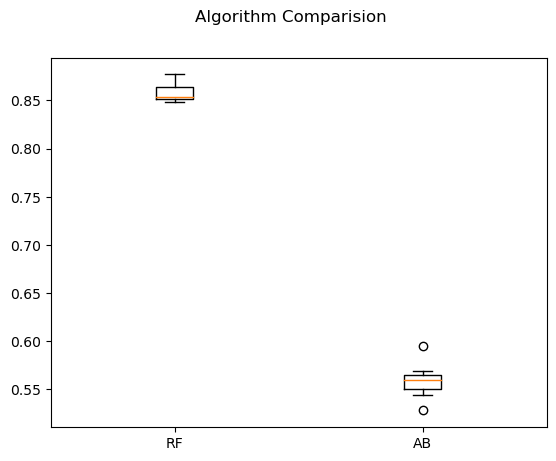

本部分耗时： 0.21843743324279785


In [11]:
time1 = time.time()

# 箱线图比较算法
fig = plt.figure()
fig.suptitle('Algorithm Comparision')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(ensembles.keys())
plt.show()


time2 = time.time()
print("本部分耗时：", time2 - time1)

In [12]:
time1 = time.time()

# 调参RF
param_grid = {}
param_grid['n_estimators'] = [10, 100, 150, 200]
model = RandomForestClassifier()
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold)
grid_result = grid.fit(X=X_train_counts_tf, y=dataset_train.target)
print('最优 : %s 使用 %s' % (grid_result.best_score_, grid_result.best_params_))

time2 = time.time()
print("本部分耗时：", time2 - time1) # 13.45小时

最优 : 0.8670710019006245 使用 {'n_estimators': 200}
本部分耗时： 48434.99038696289


# 6.确定模型

In [17]:
time1 = time.time()

# 6）生成模型
model = LogisticRegression(C=13, max_iter = 1000) # 缺省时max_iter = 100
model.fit(X_train_counts_tf, dataset_train.target)
X_test_counts = tf_transformer.transform(dataset_test.data)
predictions = model.predict(X_test_counts)
print(accuracy_score(dataset_test.target, predictions))
print(classification_report(dataset_test.target, predictions))

time2 = time.time()
print("本部分耗时：", time2 - time1)

0.8430473372781065
              precision    recall  f1-score   support

           0       0.84      0.77      0.81       319
           1       0.73      0.81      0.77       389
           2       0.76      0.74      0.75       394
           3       0.71      0.75      0.73       392
           4       0.82      0.85      0.83       385
           5       0.86      0.76      0.81       395
           6       0.82      0.91      0.86       390
           7       0.96      0.97      0.97       398
           8       0.92      0.94      0.93       397
           9       0.97      0.96      0.97       399
          10       0.96      0.92      0.94       396
          11       0.79      0.79      0.79       393
          12       0.90      0.87      0.89       396
          13       0.92      0.92      0.92       394
          14       0.86      0.92      0.89       398
          15       0.75      0.90      0.82       364
          16       0.87      0.62      0.72       310
        